In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = 'taxi_data'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'test_hire_stats.csv': 0, 'train_gps_points.csv': 1, 'train_hire_stats.csv': 2, 'zones.csv': 3, 'zones.png': 4}
['test_hire_stats.csv', 'train_gps_points.csv', 'train_hire_stats.csv', 'zones.csv', 'zones.png']
[0, 1, 2, 3, 4]


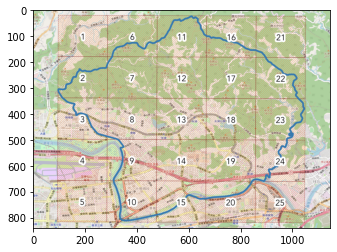

In [3]:
img = plt.imread('taxi_data/zones.png')
plt.imshow(img)
plt.show()

In [4]:
df_zones = pd.read_csv('taxi_data/zones.csv')
df_zones.shape

(25, 5)

In [5]:
df_zones.head()

,Zone_ID,left,top,right,bottom
0,1,121.551408,25.115518,121.566858,25.102831
1,2,121.551408,25.102831,121.566858,25.090144
2,3,121.551408,25.090144,121.566858,25.077457
3,4,121.551408,25.077457,121.566858,25.064770
4,5,121.551408,25.064770,121.566858,25.052083


In [6]:
df_zones.tail()

,Zone_ID,left,top,right,bottom
20,21,121.613208,25.115518,121.628658,25.102831
21,22,121.613208,25.102831,121.628658,25.090144
22,23,121.613208,25.090144,121.628658,25.077457
23,24,121.613208,25.077457,121.628658,25.064770
24,25,121.613208,25.064770,121.628658,25.052083


In [7]:
df_train = pd.read_csv('taxi_data/train_hire_stats.csv')
df_train.shape

(219600, 4)

In [8]:
df_train.head()

,Zone_ID,Date,Hour_slot,Hire_count
0,1,2016-02-01,0,0
1,1,2016-02-01,1,0
2,1,2016-02-01,2,0
3,1,2016-02-01,3,0
4,1,2016-02-01,4,0


In [9]:
df_train["tdate"] = pd.to_datetime(df_train["Date"]).dt.date

In [10]:
df_train.head()

,Zone_ID,Date,Hour_slot,Hire_count,tdate
0,1,2016-02-01,0,0,2016-02-01
1,1,2016-02-01,1,0,2016-02-01
2,1,2016-02-01,2,0,2016-02-01
3,1,2016-02-01,3,0,2016-02-01
4,1,2016-02-01,4,0,2016-02-01


In [11]:
df_test = pd.read_csv('taxi_data/test_hire_stats.csv')
df_test.shape

(6048, 5)

In [12]:
df_test.head()

,Test_ID,Zone_ID,Date,Hour_slot,Hire_count
0,0,7,2017-02-01,0,NaN
1,1,7,2017-02-01,1,NaN
2,2,7,2017-02-01,2,NaN
3,3,7,2017-02-01,3,NaN
4,4,7,2017-02-01,4,NaN


In [13]:
#0 == Monday
#1 == Tuesday
#2 == Wednesday
#3 == Thursday
#4 == Friday
#5 == Saturday
#6 == Sunday
df_train.iloc[66643]['tdate'].weekday()

4

In [14]:
len(df_train)

219600

In [15]:
workday = np.ones((len(df_train),), dtype=int)
weekday = np.ones((len(df_train),), dtype=int)

In [16]:
#additional holidays
holidays= {'2016-02-08', '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12','2016-02-29', '2016-04-04', '2016-04-05', '2016-06-09', '2016-06-10', 
'2016-09-15', '2016-09-16', '2016-10-10', '2017-01-02', '2017-01-27', '2017-01-30', '2017-02-01','2017-02-27', '2017-02-28'}
#additional workdays
makeupworkdays = {'2016-06-04', '2016-09-10', '2017-02-18'}

In [17]:
from datetime import datetime

for index, row in df_train.iterrows():
    if row['Date'] in holidays:
        workday[index] = 0
    else:
        dd = datetime.strptime(row['Date'], "%Y-%m-%d")
        weekday[index] = dd.weekday() 
        if weekday[index] >=5 and row['Date'] not in makeupworkdays:
            workday[index] = 0

In [18]:
RawX = pd.DataFrame(df_train[["Zone_ID", "Hour_slot"]])
RawX['workday'] = workday
RawX['weekday'] = weekday

In [19]:
RawX.head()

,Zone_ID,Hour_slot,workday,weekday
0,1,0,1,0
1,1,1,1,0
2,1,2,1,0
3,1,3,1,0
4,1,4,1,0


In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [21]:
enc.fit_transform(RawX)
enc.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23], dtype=int64),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6])]

In [22]:
X = enc.transform(RawX).toarray()
X.shape

(219600, 58)

In [23]:
X[0:3, :]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]])

In [24]:
y = df_train["Hire_count"].values/339.0
y.shape

(219600,)

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

In [26]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=58))
model.add(Dense(units=10, activation='softmax'))
model.add(Dropout(0.1))
model.add(Dense(1))

In [27]:
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=10, batch_size=1024, verbose=1)

Epoch 1/10
215/215 [==============================] - 1s 3ms/step - loss: 0.0036
Epoch 2/10
215/215 [==============================] - 1s 3ms/step - loss: 9.6516e-04
Epoch 3/10
215/215 [==============================] - 1s 3ms/step - loss: 8.0783e-04
Epoch 4/10
215/215 [==============================] - 1s 3ms/step - loss: 7.6285e-04
Epoch 5/10
215/215 [==============================] - 1s 4ms/step - loss: 7.3876e-04
Epoch 6/10
215/215 [==============================] - 1s 3ms/step - loss: 7.1746e-04
Epoch 7/10
215/215 [==============================] - 1s 3ms/step - loss: 7.1087e-04
Epoch 8/10
215/215 [==============================] - ETA: 0s - loss: 7.0594e-0 - 1s 4ms/step - loss: 7.0628e-04
Epoch 9/10
215/215 [==============================] - 1s 4ms/step - loss: 6.9670e-04
Epoch 10/10
215/215 [==============================] - 1s 4ms/step - loss: 6.9323e-04


In [28]:
yhat = model.predict(X)*339.0

In [29]:
for i in range(len(yhat)):
  if yhat[i] < 0.0:
    yhat[i] = 0.0

In [30]:
dfhat = pd.DataFrame(yhat)
dfhat.to_csv('train_predict.csv')

In [31]:
df_test = pd.read_csv('taxi_data/test_hire_stats.csv')
df_test.shape

(6048, 5)

In [32]:
df_test.head()

,Test_ID,Zone_ID,Date,Hour_slot,Hire_count
0,0,7,2017-02-01,0,NaN
1,1,7,2017-02-01,1,NaN
2,2,7,2017-02-01,2,NaN
3,3,7,2017-02-01,3,NaN
4,4,7,2017-02-01,4,NaN


In [33]:
workday2 = np.ones((len(df_test),), dtype=int)
weekday2 = np.ones((len(df_test),), dtype=int)

In [34]:
for index, row in df_test.iterrows():
    if row['Date'] in holidays:
        workday2[index] = 0
    else:
        dd=datetime.strptime(row['Date'], "%Y-%m-%d")
        weekday2[index]= dd.weekday() 
        if weekday2[index] >=5 and row['Date'] not in makeupworkdays:
            workday2[index] = 0

In [35]:
Test = pd.DataFrame(df_test[["Zone_ID", "Hour_slot"]])
Test['workday'] = workday2
Test['weekday'] = weekday2

In [36]:
Xtest = enc.transform(Test).toarray()
Xtest.shape

(6048, 58)

In [37]:
yt = model.predict(Xtest)*339.0

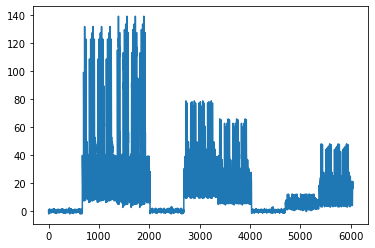

In [38]:
plt.plot(yt)

In [39]:
dfOut = pd.DataFrame(yt)

In [40]:
dfOut.to_csv('Result.csv')